In [19]:
# data
import numpy as np
import matplotlib.pyplot as plt

def get_column(data, index):
    result = [row[index] for row in data]
    return result

data = np.genfromtxt('E:\AIO\Vectorization_For_Linear_Regression\Data\data.csv', delimiter=',').tolist()

x_data  = get_column(data, 0)
y_data = get_column(data, 1)
N = len(x_data)

print(f'areas: {x_data}')
print(f'prices: {y_data}')
print(f'data_size: {N}')

areas: [6.7, 4.6, 3.5, 5.5]
prices: [9.1, 5.9, 4.6, 6.7]
data_size: 4


In [20]:
#foward
def predict(x, w, b):
    return w*x + b

#compute loss
def compute_loss(y_hat, y):
    return abs(y_hat - y)

#compute gradient
def compute_gradient(x, y_hat, y):
    dl_dw = x*((y_hat - y)/abs(y_hat - y))
    dl_db = (y_hat - y)/abs(y_hat - y)
    return dl_dw, dl_db

#update weights
def update_weights(w, b, dl_dw, dl_db, lr):
    w = w - dl_dw*lr
    b = b - dl_db*lr
    return w, b

In [21]:
#init weights
w = -0.34
b = 0.04
lr = 0.01

In [22]:
#paramters
num_epoch = 60
losses = []

for epoch in range(num_epoch):

    #for a epoch
    acc_loss = 0
    acc_dl_dw = 0
    acc_dl_db = 0
    for i in range(N):

        #get a sample
        x = x_data[i]
        y = y_data[i]

        #compute predict
        y_hat = predict(x, w, b)

        #compute loss
        loss = compute_loss(y_hat, y)
        acc_loss = acc_loss + loss

        #compute gradient
        dl_dw, dl_db = compute_gradient(x, y_hat, y)
        acc_dl_dw = acc_dl_dw + dl_dw
        acc_dl_db = acc_dl_db + dl_db
    
    #compute averge
    avg_loss = acc_loss/N
    losses.append(avg_loss)
    avg_dl_dw = acc_dl_dw / N
    avg_dl_db = acc_dl_db /N

    #update weights
    w, b = update_weights(w, b, avg_dl_dw, avg_dl_db, lr)

print(w, b)

1.212000000000002 0.34000000000000014


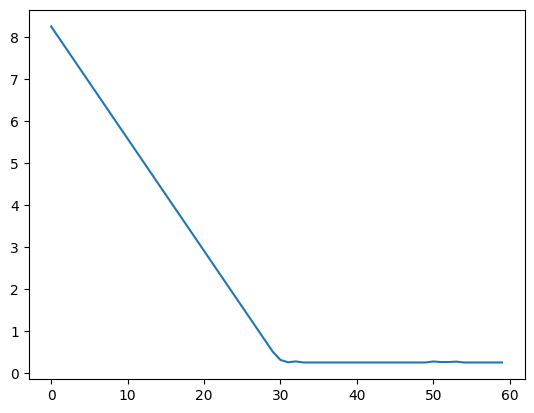

In [23]:
import matplotlib.pyplot as plt
plt.plot(losses)

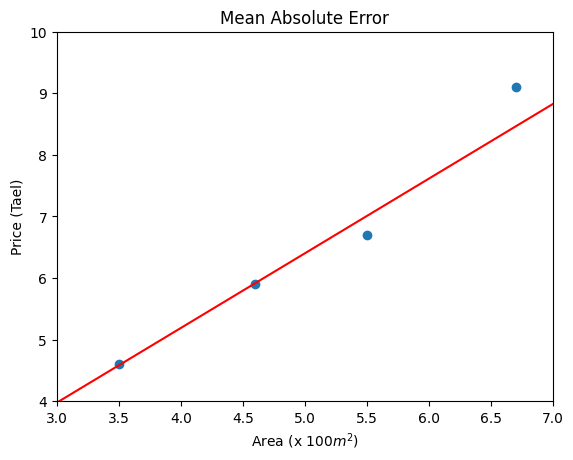

In [24]:
x_data = range(2, 8)
y_data = [x*w + b for x in x_data]
plt.plot(x_data, y_data, 'r')

data = np.genfromtxt('E:\AIO\Vectorization_For_Linear_Regression\Data\data.csv', delimiter=',').tolist()
areas  = get_column(data, 0)
prices = get_column(data, 1)
plt.scatter(areas, prices)

#--------------------------------------
plt.xlabel('Area (x 100$m^2$)')
plt.ylabel('Price (Tael)')
plt.title('Mean Absolute Error')

plt.xlim(3,7)
plt.ylim(4,10)
plt.show()